# Inversion of a Transect of MT Tipper data. Part IV

This dataset consists of 29 Magnetotelluric stations arranged on a 2D transect. Our objective is to invert the tipper data on line 5000 using MtPy to (hopefully) reveal a conductive structure known to exist under the array. While the task is straightforward, there are a number of smaller tasks we'll have to complete in sequence:

1) Loading and cleaning the data

2) Parsing data into MtPy compatible formats

3) Visualizing the data

4) Set up Occam2D Inversion

5) Explore Inversion Parameters

6) Analyze Results

Before following this jupyter notebook tutorial, ensure you have completed and run the ```Part_II.Data_Processing``` notebook.
#### How to use this notebook

Cells in this notebook are divided into two types:

- Helper Cells

- Data Manipulation/Exploration Cells

Only the "Helper cells" are labeled for convenience. You may, of course, edit any cell you wish, or copy bits of code to use in your own analysis. There is one external module you need called ```cartopy_mapping.py```. Make sure this python file is in the same directory you run this notebook from.

This notebook performs step 6 as described above. It is meant to be used after to executing Part_III.Data_Processing. The first cell you execute will shoot out some warnings. Don't worry, this won't affect anything.

## Step 6. Analyze Results

After parts 1-5, we should have the data available in the ```original_data``` subdirectory as a series of .edi files. We also should have a series of '.iter' files in the ```occam2d_inv``` directory. Our task now is to interpret the results of the inversion in the most rigourous way possible. 

There are a few things we can do:

* Compare the inversion sections to the tipper arrows.

* Compare the simulated foward model data to the actual data.

* Compare the simulated forward model data to the missing data.

Ultimately, I'd like to know:

* The number of anomalies.

* The overall shape of the anomalies.

* The magnitude of anomalies.


In [139]:
"""
HELPER CELL

for importing relevant modules and globals, plus a 2d plotting routine

"""
import mtpy.modeling.occam2d_rewrite as occam2d
from mtpy.modeling.occam2d_rewrite import PlotResponse, PlotModel, Model, Response
from mtpy.core.mt import MT
from pyproj import Geod
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import cartopy_mapping
edi_path='edi_files'
save_path='occam2d_inv'

def plot_2d_section(file,datafn):
    fig = plt.figure(figsize=(15,25))
    pltm     = PlotModel(iter_fn=file,data_fn=datafn,xpad=3,yscale = 'm',climits=(1,2.5),station_font_pad=0.1,
                   dpi=150,fig_aspect = 1.0,ylimits = (0,5),cmap=cmap.get_cmap('jet_r'),cb_shrink= 0.2)
    
def plot_data_comparison(prefix):
    datafn   = os.path.join(save_path,'OccamDataFile.dat')
    meshfn   = os.path.join(save_path,'Occam2dMesh')
    modelfn  = os.path.join(save_path,'Occam2DModel')
    respfile = os.path.join(save_path,'{}.resp'.format(prefix))
    iter_file = os.path.join(save_path,'{}.iter'.format(prefix))
    
    resp_obj = Response()
    resp_obj.read_response_file(respfile)
    
    ocd = occam2d.Data()
    ocd.read_data_file(data_fn=datafn)
    
    m=Model(iter_fn=iter_file,model_fn=modelfn,mesh_fn=meshfn)
    m.read_iter_file(iter_fn=iter_file)
    m.build_model()
    
    fig = plt.figure(figsize=(15,15))
    
    for index, location in enumerate(ocd.station_locations):
        real_model_resp = resp_obj.resp[index]['re_tip'][0,:]
        im_model_resp   = resp_obj.resp[index]['im_tip'][0,:]
        print(location)
    
    ax1 = fig.add_subplot(2,48,1)
    ax1.pcolormesh(m.mesh_x,m.mesh_z,m.res_model,cmap='jet_r')
    ax1.scatter(ocd.station_locations,np.zeros(len(ocd.station_locations))-100,
                marker='v',color='black',s=160)
    ax1.tick_params(axis='y', labelsize=15 )
    ax1.tick_params(axis='x', labelsize=12 )
    ax1.invert_yaxis()
    ax1.set_xlim([-1500,8500])
    ax1.set_xticks(np.linspace(0,7000,num=15))
    ax1.set_yticks(np.linspace(0,5000,num=6))
    ax1.set_ylim([5000,-300])
    ax1.set_xlabel('meters along profile',fontsize=15)
    ax1.set_ylabel('meters depth',fontsize=15)
    plt.show()

Reading from occam2d_inv/OccamDataFile.dat
    profile_angle = 220.0
    geoelectric_strike = 130.0
    number of sites = 24
    number of frequencies = 8
0.0
251.2
501.3
759.2
966.3
1506.3
1993.1
2249.8
2496.5
2750.7
3007.1
3252.5
3506.4
3749.2
4009.2
4501.7
4757.2
5005.5
5489.3
5756.0
6004.1
6244.5
6747.6
6991.4


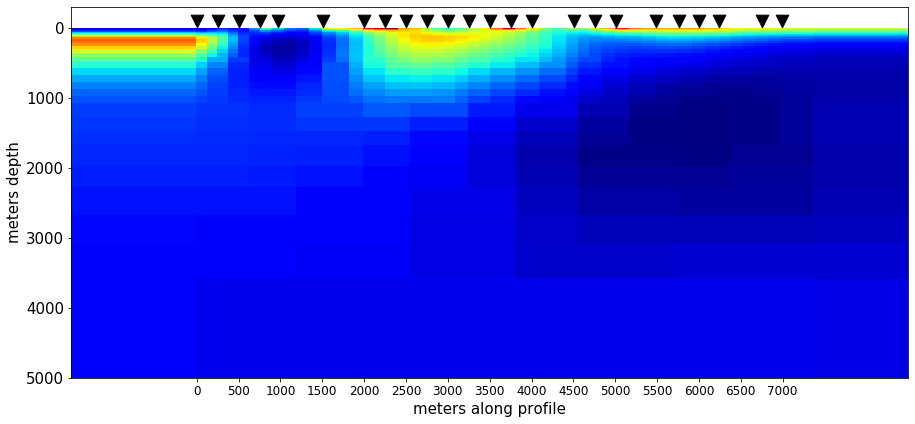

In [140]:
# data and response files
plot_data_comparison('optimized_no_diag10')

Reading from occam2d_inv/OccamDataFile.dat
    profile_angle = 220.0
    geoelectric_strike = 130.0
    number of sites = 24
    number of frequencies = 8


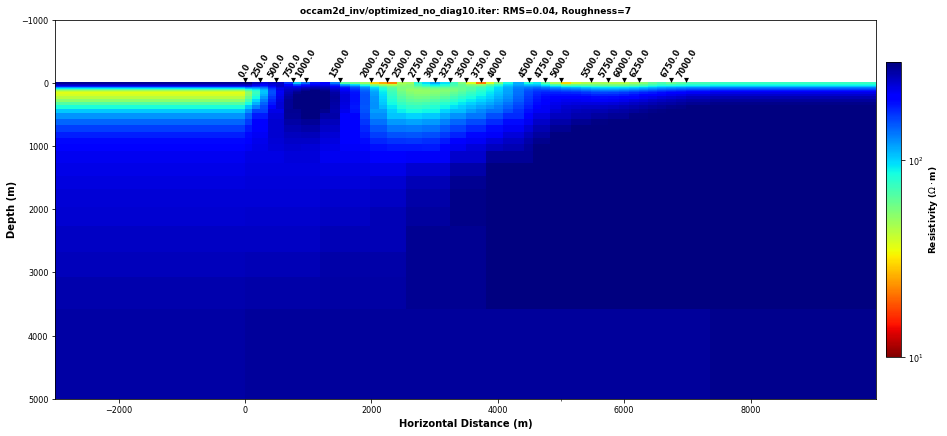

In [159]:
iterfile = 'occam2d_inv/optimized_no_diag10.iter'
datafn   = 'occam2d_inv/OccamDataFile.dat'
plot_2d_section(iterfile,datafn)

It is tempting to interpret this section immediately, but lets hold off on it. How does this profile compare to the one with a diagonal penalty?

Rotated Z and Tipper to align with +130.00 degrees E of N
Profile angle is +220.00 degrees E of N


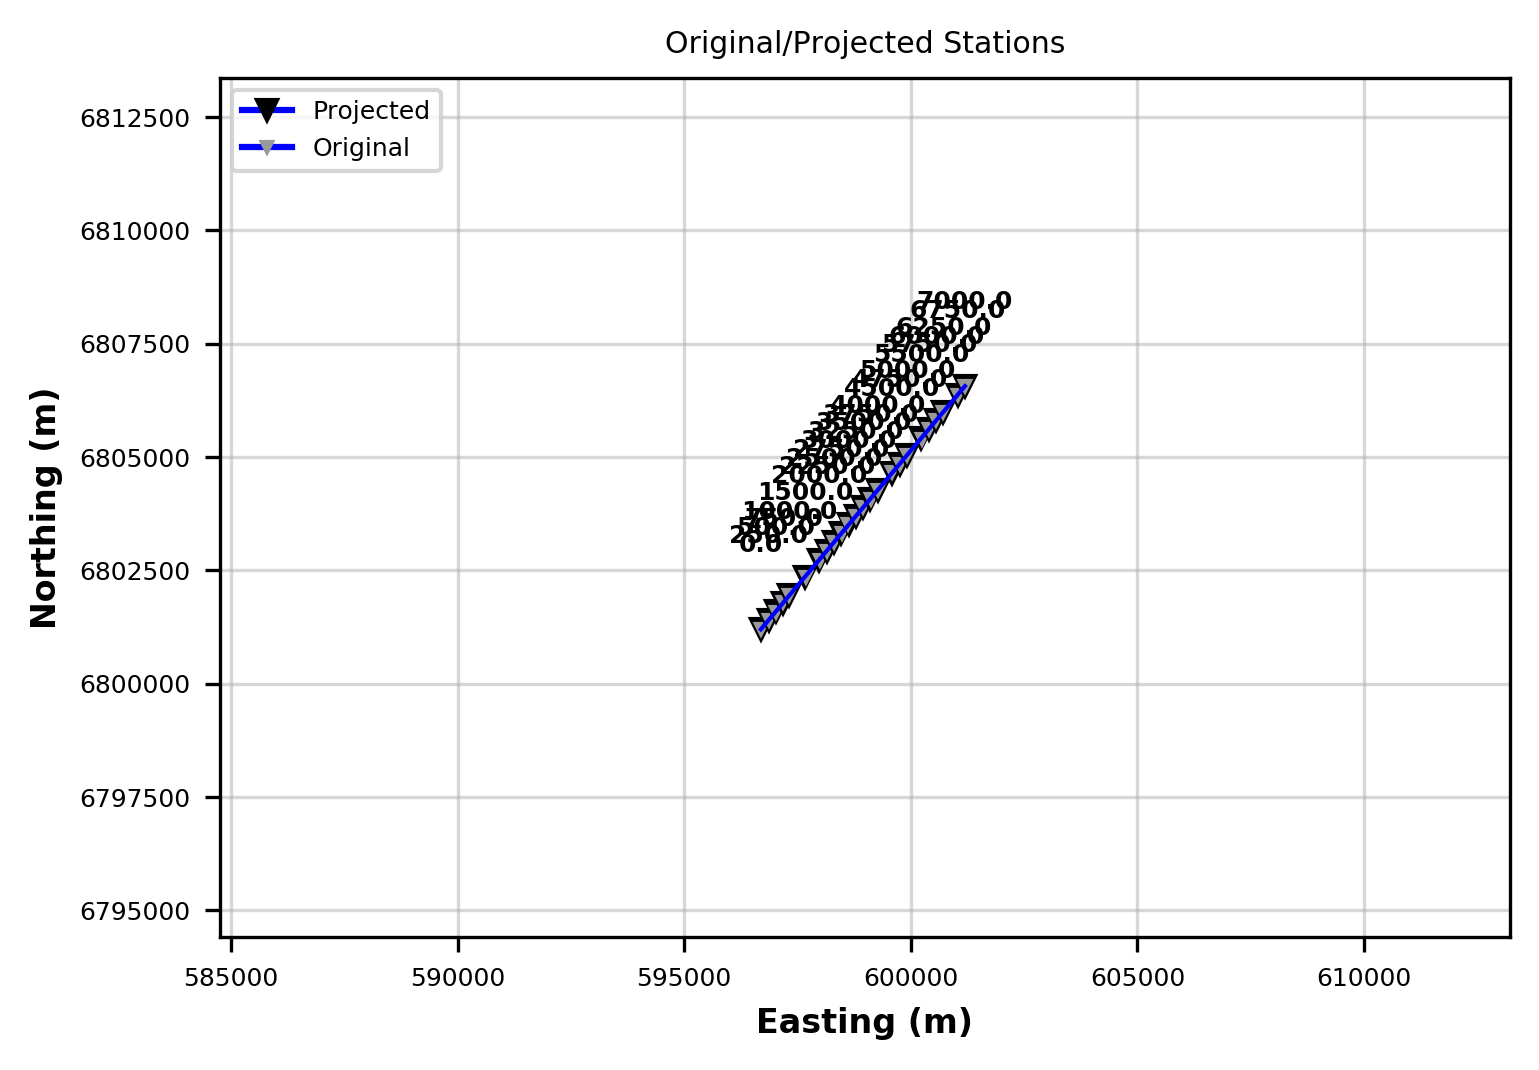

Wrote Occam2D data file to occam2d_inv/OccamDataFile.dat
                    MESH PARAMETERS                    
  number of horizontal nodes = 112
  number of vertical nodes   = 40
  Total Horizontal Distance  = 34710.521879
  Total Vertical Distance    = 18570.000000
               REGULARIZATION PARAMETERS               
   binding offset       = 0.0
   number layers        = 35
   number of parameters = 1277
   number of free param = 1277
                    MESH PARAMETERS                    
  number of horizontal nodes = 112
  number of vertical nodes   = 40
  Total Horizontal Distance  = 34710.521879
  Total Vertical Distance    = 18570.000000
               REGULARIZATION PARAMETERS               
   binding offset       = 0.0
   number layers        = 35
   number of parameters = 1277
   number of free param = 1277
Wrote Mesh file to occam2d_inv/Occam2DMesh
Wrote Regularization file to occam2d_inv/Occam2DModel
Wrote Occam2D startup file to occam2d_inv/Occam2DStartup


In [160]:
occam_data_object, occam_model_object, occam_startup_file=create_occam_objects(z1_layer=5,diagonal_penalties=1,
                                                            target_misfit=4.5e-2,iterations_to_run=8)

Send it to the CPU!
```
./Occam2D Occam2DStartup optimized_diag
```
...

..

.

When finished, my terminal says it completes at iteration 8 within the misfit target! Lets look at the transect.

Reading from occam2d_inv/OccamDataFile.dat
    profile_angle = 220.0
    geoelectric_strike = 130.0
    number of sites = 24
    number of frequencies = 8


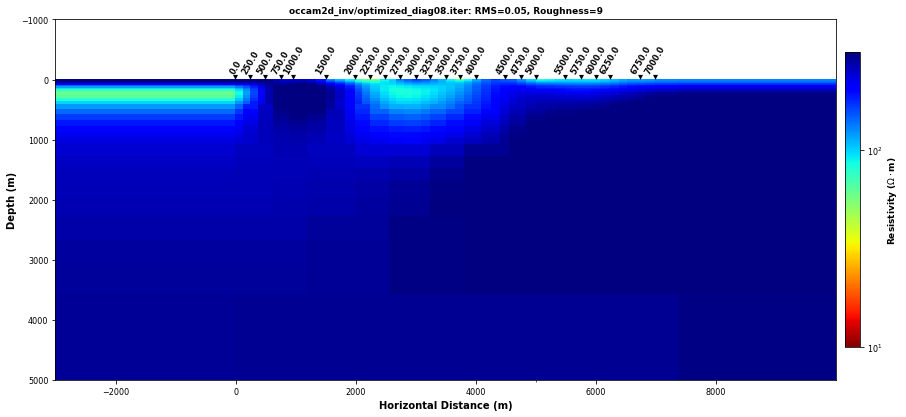

In [162]:
iterfile = 'occam2d_inv/optimized_diag08.iter'
datafn   = 'occam2d_inv/OccamDataFile.dat'
plot_2d_section(iterfile,datafn)

All of the anomalies present in the first approach are present in this one too, albeit to different degrees. 

In the next notebook I'll analyze these two models and attempt to interpret what we see in context of the data.